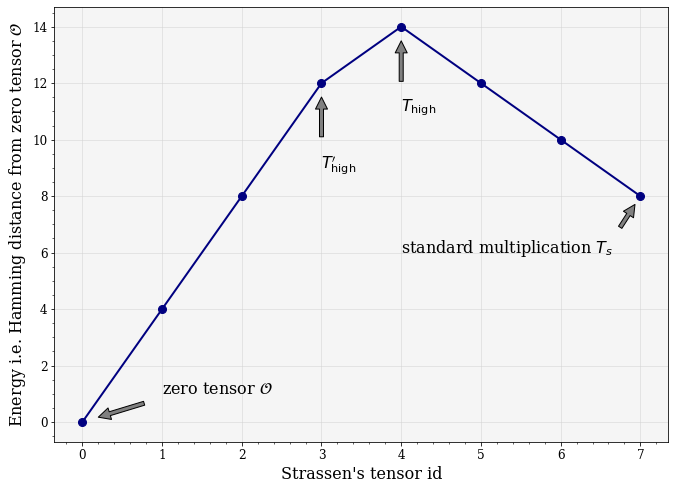

In [13]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Serif'
import numpy as np
import pickle
import itertools
import dimod

vectors = [
            np.tensordot([1,1,0,0],  np.tensordot([0,0,0,1], [-1,1,0,0], axes=0), axes=0),
            np.tensordot([0,0,0,1], np.tensordot([-1,0,1,0], [1,0,1,0], axes=0), axes=0),
            np.tensordot([-1,0,1,0], np.tensordot([1,1,0,0], [0,0,0,1], axes=0), axes=0),
            np.tensordot([1,0,0,1],  np.tensordot([1,0,0,1], [1,0,0,1], axes=0), axes=0),
            np.tensordot([0,1,0,-1], np.tensordot([0,0,1,1], [1,0,0,0], axes=0), axes=0),
            np.tensordot([1,0,0,0],  np.tensordot([0,1,0,-1], [0,1,0,1], axes=0), axes=0),
            np.tensordot([0,0,1,1],  np.tensordot([1,0,0,0], [0,0,1,-1], axes=0), axes=0)]

# Data
energy_levels = [0]
zeros = np.zeros((4,4,4))
for strassen_tensor in vectors:
    zeros = np.mod(zeros + strassen_tensor, 2)
    energy_levels.append(np.count_nonzero(zeros))

# Plotting
plt.figure(figsize=(11, 8))
plt.plot(energy_levels, marker='o', markersize=8, linestyle='-', linewidth=2, color='navy')
plt.title("")
plt.xlabel("Strassen's tensor id", fontsize=16)
plt.ylabel("Energy i.e. Hamming distance from zero tensor $\mathcal{O}$", fontsize=16)
plt.grid(True)
plt.xticks(range(len(energy_levels)))

# Adding minor ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Adding a background color to the plot for better contrast
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Adding annotations for the highest and lowest points
plt.annotate('$T_{\\text{high}}$', xy=(4, 14), xytext=(4, 11),
             arrowprops=dict(facecolor='gray', shrink=0.2),
             fontsize=16)
plt.annotate("$T_{\\text{high}}'$", xy=(3, 12), xytext=(3, 9),
             arrowprops=dict(facecolor='gray', shrink=0.2),
             fontsize=16)
plt.annotate('zero tensor $\mathcal{O}$', xy=(0, 0), xytext=(1, 1),
             arrowprops=dict(facecolor='gray', shrink=0.2),
             fontsize=16)
plt.annotate('standard multiplication $T_s$', xy=(7, 8), xytext=(4, 6),
             arrowprops=dict(facecolor='gray', shrink=0.2),
             fontsize=16)

plt.show()


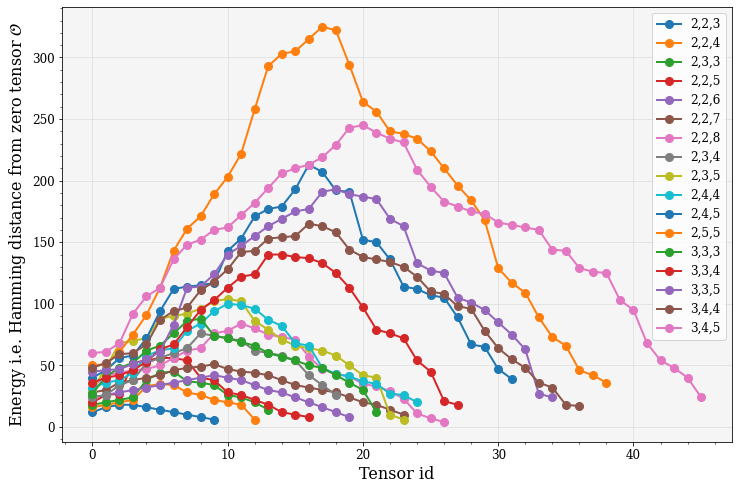

In [18]:
factorizations = None
with open("..//files//ordered_tensor_factorizations_r.pkl", "rb") as f:
    factorizations = pickle.load(f)
    
# Setting up the plot
plt.figure(figsize=(12, 8))
#plt.title("Visualization of Orders", fontsize=16, fontweight='bold')
plt.xlabel("Tensor id", fontsize=16)
plt.ylabel("Energy i.e. Hamming distance from zero tensor $\mathcal{O}$", fontsize=16)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

# Plotting each set of orders
for key in factorizations:
    orders = factorizations[key]["increasing_order"] + factorizations[key]["decreasing_order"]
    plt.plot(orders, marker='o', markersize=8, linestyle='-', linewidth=2, label=f"{key}")

# Adding a legend
plt.legend(fontsize=12, loc='upper right')

# Display the plot
plt.show()
    

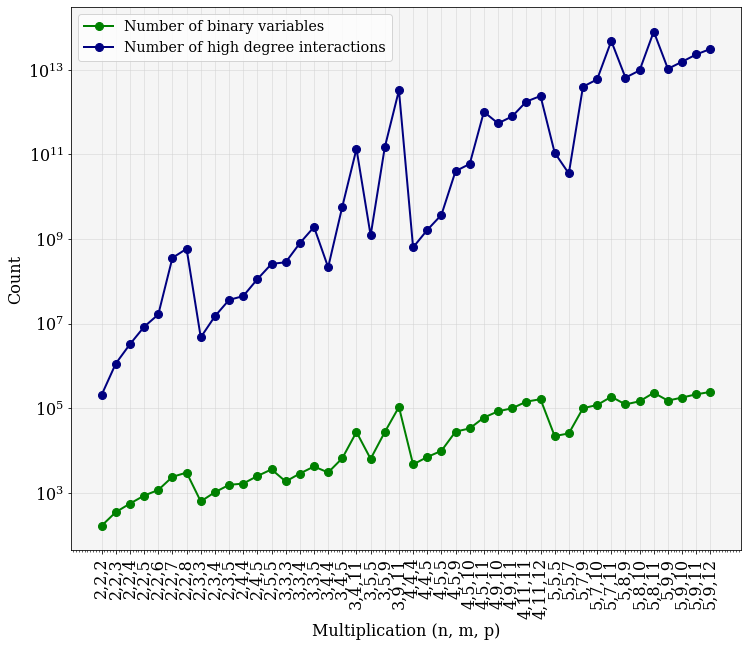

In [3]:
data = [[2, 2, 2, 2, 7], [2, 2, 2, 3, 11], [2, 2, 2, 4, 14], [2, 2, 2, 5, 18], [2, 2, 2, 6, 21], [3, 2, 2, 7, 25], [3, 2, 2, 8, 28], [2, 2, 3, 3, 15], [2, 2, 3, 4, 20], [2, 2, 3, 5, 25], [2, 2, 4, 4, 26], [2, 2, 4, 5, 33], [2, 2, 5, 5, 40], [3, 3, 3, 3, 23], [3, 3, 3, 4, 29], [3, 3, 3, 5, 36], [2, 3, 4, 4, 38], [3, 3, 4, 5, 47], [3, 3, 4, 11, 103], [2, 3, 5, 5, 58], [3, 3, 5, 9, 105], [3, 3, 9, 11, 225], [2, 4, 4, 4, 49], [2, 4, 4, 5, 63], [2, 4, 5, 5, 76], [2, 4, 5, 9, 139], [2, 4, 5, 10, 152], [3, 4, 5, 11, 169], [2, 4, 9, 10, 255], [2, 4, 9, 11, 280], [2, 4, 11, 11, 343], [2, 4, 11, 12, 366], [3, 5, 5, 5, 98], [2, 5, 5, 7, 134], [3, 5, 7, 9, 234], [3, 5, 7, 10, 257], [4, 5, 7, 11, 280], [3, 5, 8, 9, 262], [3, 5, 8, 10, 287], [4, 5, 8, 11, 317], [3, 5, 9, 9, 296], [3, 5, 9, 10, 323], [3, 5, 9, 11, 358], [3, 5, 9, 12, 381], [2, 6, 7, 9, 270], [3, 6, 7, 10, 296], [4, 6, 7, 11, 322], [3, 6, 8, 10, 329], [3, 6, 8, 11, 365], [3, 6, 9, 9, 342], [3, 6, 9, 10, 373], [3, 6, 9, 11, 411], [3, 7, 7, 9, 318], [3, 7, 7, 10, 350], [4, 7, 7, 11, 384], [3, 7, 8, 9, 354], [3, 7, 8, 10, 393], [3, 7, 8, 11, 432], [3, 7, 8, 12, 462], [3, 7, 9, 9, 399], [3, 7, 9, 10, 441], [3, 7, 9, 11, 481], [3, 7, 9, 12, 510], [2, 7, 10, 10, 478], [3, 7, 10, 11, 536], [3, 7, 11, 11, 582], [3, 8, 8, 10, 441], [3, 8, 8, 11, 489], [3, 8, 9, 10, 489], [3, 8, 9, 11, 533], [3, 8, 9, 12, 560], [2, 8, 10, 10, 532], [3, 8, 10, 11, 596], [3, 8, 10, 12, 636], [3, 8, 11, 11, 649], [3, 8, 11, 12, 691], [3, 9, 9, 9, 498], [3, 9, 9, 10, 534], [3, 9, 9, 11, 576], [3, 9, 10, 10, 606], [4, 9, 10, 11, 657], [3, 9, 10, 12, 696], [3, 9, 11, 11, 725], [3, 9, 11, 12, 760], [3, 10, 10, 10, 682], [4, 10, 10, 11, 746], [3, 10, 10, 12, 798], [3, 10, 11, 11, 821], [4, 10, 11, 12, 874], [3, 10, 12, 12, 928], [3, 11, 11, 11, 896], [3, 11, 11, 12, 941], [3, 11, 12, 12, 990]]
# Dividing data into three groups based on the value of n
group1 = [p for p in data if p[1] in [2, 3, 4, 5]]
group2 = [p for p in data if p[1] in [5, 6, 7]]
group3 = [p for p in data if p[1] in [8, 9, 10, 11]]

def calculate_and_plot(data_group):
    # Using the provided formula: n^2m^2p^2(Rk^3 + 1)^2 for the calculation
    limited_values = [n**2 * m**2 * p**2 * (R * k**3 + 1)**2 for k, n, m, p, R in data_group]
    number_of_variables = [R*k*(n*m + m*p + p*n) for k, n, m, p, R in data_group]
    x_labels = [f"{n},{m},{p}" for _, n, m, p, _ in data_group]

    # Plotting with the updated x-axis labels
    plt.figure(figsize=(12, 10))
    plt.yscale('log')
    plt.plot(number_of_variables, marker='o', markersize=8, linestyle='-', linewidth=2, color='green', label="Number of binary variables")
    plt.plot(limited_values, marker='o', markersize=8, linestyle='-', linewidth=2, color='navy', label="Number of high degree interactions")
    #plt.title('Plot of n^2 * m^2 * p^2 * (R * k^3 + 1)^2 with Custom Data Point Labels')
    plt.xlabel('Multiplication (n, m, p)', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(range(len(limited_values)), x_labels, rotation='vertical', fontsize=16)
    plt.grid(True)
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.minorticks_on()
    plt.tick_params(axis='y', labelsize=16)
    plt.legend()
    plt.legend(loc='upper left')
    plt.legend(fontsize='x-large')
    plt.show()
    
calculate_and_plot(group1)
#calculate_and_plot(group2)
#calculate_and_plot(group3)

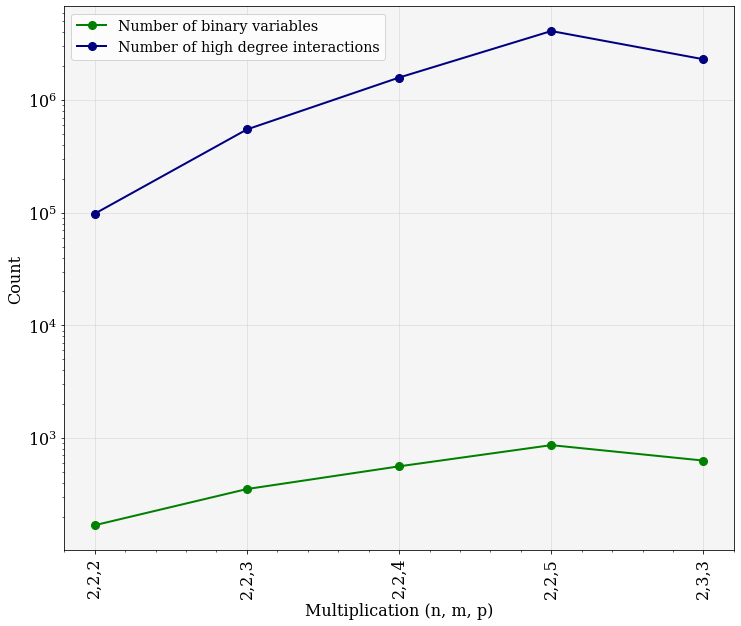

In [4]:
data = [[2,2,2,168, 98112], [2,2,3,352, 549648], [2,2,4,560, 1587712], [2,2,5,864, 4111200], [2,3,3,630, 2308500]]

number_of_interactions = [i for n, m, p, v, i in data]
number_of_variables = [v for n, m, p, v, i in data]
x_labels = [f"{n},{m},{p}" for n, m, p, _, _ in data]
    
# Plotting with the updated x-axis labels
plt.figure(figsize=(12, 10))
plt.yscale('log')
plt.plot(number_of_variables, marker='o', markersize=8, linestyle='-', linewidth=2, color='green', label="Number of binary variables")
plt.plot(number_of_interactions, marker='o', markersize=8, linestyle='-', linewidth=2, color='navy', label="Number of high degree interactions")
#plt.title('Plot of n^2 * m^2 * p^2 * (R * k^3 + 1)^2 with Custom Data Point Labels')
plt.xlabel('Multiplication (n, m, p)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(range(len(number_of_interactions)), x_labels, rotation='vertical', fontsize=16)
plt.grid(True)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.minorticks_on()
plt.tick_params(axis='y', labelsize=16)
plt.legend()
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')
plt.show()

In [5]:
combinations = set(list(itertools.permutations([(1,1), (1,1), (1,1), (0,0), (0,0), (0,0)], 3)))

def get_optimal_energy(dim_n, dim_m, dim_p, suggested_optimal, vectors):
    results = []
    for triple in combinations:
        print(triple)
        variables_to_values = dict()
        for i in range(suggested_optimal):
            
            for j in range(dim_n*dim_m):
                if vectors[i][0][j] == 1:
                    variables_to_values["l_" + str(i) + "x" + str(j)] = 1
                    variables_to_values["r_" + str(i) + "x" + str(j)] = 0
                elif vectors[i][0][j] == -1:
                    variables_to_values["l_" + str(i) + "x" + str(j)] = 0
                    variables_to_values["r_" + str(i) + "x" + str(j)] = 1
                else:
                    variables_to_values["l_" + str(i) + "x" + str(j)] = triple[0][0]
                    variables_to_values["r_" + str(i) + "x" + str(j)] = triple[0][1]
                    
            for j in range(dim_m*dim_p):    
                if vectors[i][1][j] == 1:
                    variables_to_values["l_" + str(i) + "y" + str(j)] = 1
                    variables_to_values["r_" + str(i) + "y" + str(j)] = 0
                elif vectors[i][1][j] == -1:
                    variables_to_values["l_" + str(i) + "y" + str(j)] = 0
                    variables_to_values["r_" + str(i) + "y" + str(j)] = 1
                else:
                    variables_to_values["l_" + str(i) + "y" + str(j)] = triple[1][0]
                    variables_to_values["r_" + str(i) + "y" + str(j)] = triple[1][1]
            
            for j in range(dim_n*dim_p):            
                if vectors[i][2][j] == 1:
                    variables_to_values["l_" + str(i) + "z" + str(j)] = 1
                    variables_to_values["r_" + str(i) + "z" + str(j)] = 0
                elif vectors[i][2][j] == -1:
                    variables_to_values["l_" + str(i) + "z" + str(j)] = 0
                    variables_to_values["r_" + str(i) + "z" + str(j)] = 1
                else:
                    variables_to_values["l_" + str(i) + "z" + str(j)] = triple[2][0]
                    variables_to_values["r_" + str(i) + "z" + str(j)] = triple[2][1]         
        results.append(variables_to_values)
    return results


strassen_tensors = [[[0,0,0,1], [-1,0,1,0], [1,0,1,0]],
                        [[1,1,0,0], [0,0,0,1], [-1,1,0,0]],
                        [[-1,0,1,0], [1,1,0,0], [0,0,0,1]],
                        [[1,0,0,1], [1,0,0,1], [1,0,0,1]],
                        [[0,1,0,-1], [0,0,1,1], [1,0,0,0]],
                        [[1,0,0,0], [0,1,0,-1], [0,1,0,1]],
                        [[0,0,1,1], [1,0,0,0], [0,0,1,-1]]]

optimal_bins = get_optimal_energy(2, 2, 2, 7, strassen_tensors)
print("Optimal binary: ", len(optimal_bins))
# Map optimal to integer
sorted_keys = list(reversed(sorted(optimal_bins[0].keys())))
optimals = []
for optimal_bin in optimal_bins:
    o = []
    for key in sorted_keys:
        o.append(optimal_bin[key])
    optimals.append(int(''.join(map(str, o)), 2))
#optimals = [[optimal_bin[key] for key in sorted_keys] for optimal_bin in optimal_bins]
print("Optimal binary: ", optimals)

res = [[int(i) for i in np.binary_repr(optimal, width=168)] for optimal in optimals]
#print("Optimal binary: ", res)
#optimal_bin2 = dict(zip(reversed(sorted_keys), res))
#for key in optimal_bin2:
#    if optimal_bin2[key] != optimal_bin[key]:
#        print(key)



((1, 1), (1, 1), (1, 1))
((1, 1), (0, 0), (1, 1))
((0, 0), (1, 1), (1, 1))
((0, 0), (0, 0), (1, 1))
((1, 1), (1, 1), (0, 0))
((1, 1), (0, 0), (0, 0))
((0, 0), (1, 1), (0, 0))
((0, 0), (0, 0), (0, 0))
Optimal binary:  8
Optimal binary:  [277992858216604853726112009723087789352294110199791, 257530050972891804422094054816397850195117306609487, 277718514421941962032438640796276799293533300146152, 257255707178228912728420685889586860136356496555848, 207812215155673069758206500034443415298538900289007, 187349407911960020454188545127753476141362096698703, 207537871361010178064533131107632425239778090235368, 187075064117297128760515176200942486082601286645064]


Key:  222
Number of terms in hubo:  98112
Number of variables in binary polynomial:  168
[-8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0]
Optimal value inserted at index:  5000
Optimal value inserted at index:  5008
Optimal value inserted at index:  5548
Optimal value inserted at index:  5557
Optimal value inserted at index:  6879
Optimal value inserted at index:  6888
Optimal value inserted at index:  7428
Optimal value inserted at index:  7437


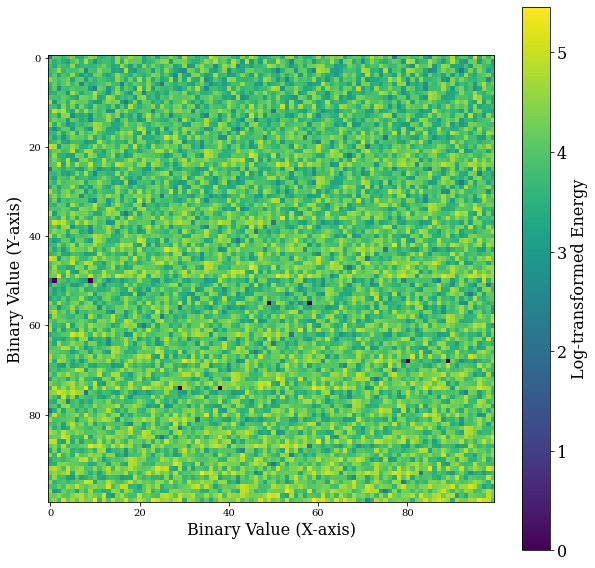

In [25]:

keys = ["222"] #"223", "224", "225", "233"]
for key in keys:
    print("Key: ", key)
    hubo = pickle.load(open("..//files//hubo_" + key + ".pkl", "rb"))
    offset = hubo["offset"]
    print("Number of terms in hubo: ", len(hubo["hubo"]))
    polynomial = dimod.BinaryPolynomial.from_hubo(hubo["hubo"])
    print("Number of variables in binary polynomial: ", len(polynomial.variables))
    print([polynomial.energy(optimal_bin) for optimal_bin in optimal_bins])

    # Sample random binary values for the variables
    num_variables = len(polynomial.variables)
    #samples = np.random.randint(2, size=(num_samples, num_variables))
    #samples_for_dimod = [dict(zip(polynomial.variables, sample)) for sample in samples]
    #energies = np.array(polynomial.energies(samples_for_dimod))
    
    # Normalize energies for visualization (optional)
    #normalized_energies = (energies - np.min(energies)) / (np.max(energies) - np.min(energies))

    grid_size = 100
    values = []
    energies = np.zeros((grid_size, grid_size))
    samples = []
    variables = list(reversed(sorted(polynomial.variables)))
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Scale grid index to binary value range
            scaled_value = int(((i * grid_size + j) / (grid_size**2)) * (2**num_variables))
            values.append(scaled_value)
            #print(scaled_value)
            # Convert to binary vector
            
    optimal = optimals[0]
    # pick 100 values around the optimal value
    #values = list(range(optimal - 4950, optimal + 5050))
    #print(len(values))
    
    # Position optimal value at the correct index
    for i in range(len(values)):
        for optimal in optimals:
            if values[i] < optimal and values[i+1] > optimal:
                #print(values[i], values[i+1])
                values.insert(i + 1, optimal) #int((2**168)/2))
                print("Optimal value inserted at index: ", i)
                #print("Optimal value: ", optimal)
                break
    
    for scaled_value in values:
        binary_vector = [int(i) for i in np.binary_repr(scaled_value, width=num_variables)] #np.binary_repr(scaled_value, width=num_variables)]
        #print(binary_vector)
        sample = dict(zip(variables, binary_vector))
        samples.append(sample)
        # Evaluate energy and store
        #energies[i, j] = polynomial.energy(sample)
            
    p_energies = polynomial.energies(samples) + offset
    
    for i in range(grid_size):
        for j in range(grid_size):
            energies[i, j] = p_energies[i*grid_size + j]

    # Normalize energies for better visualization
    #normalized_energies = (energies - np.min(energies)) / (np.max(energies) - np.min(energies))
    
    log_transformed_data = np.log1p(energies)

    # Plot heatmap
    plt.figure(figsize=(10, 10))
    plt.imshow(log_transformed_data, cmap='viridis')
    cbar = plt.colorbar()
    cbar.set_label('Log-transformed Energy', fontsize=16)
    cbar.ax.tick_params(labelsize=16)
    #plt.title('Heatmap of Energies for Binary Polynomial')
    plt.xlabel('Binary Value (X-axis)', fontsize=16)
    plt.ylabel('Binary Value (Y-axis)', fontsize=16)
    plt.show()
    
    #plt.hist(energies, bins=50, color='blue', alpha=0.7)
    #plt.title('Distribution of Polynomial Energies')
    #plt.xlabel('Energy')
    #plt.ylabel('Frequency')
    #plt.show()



In [7]:
for e in p_energies:
    if e <= 0:
        print(e)

0


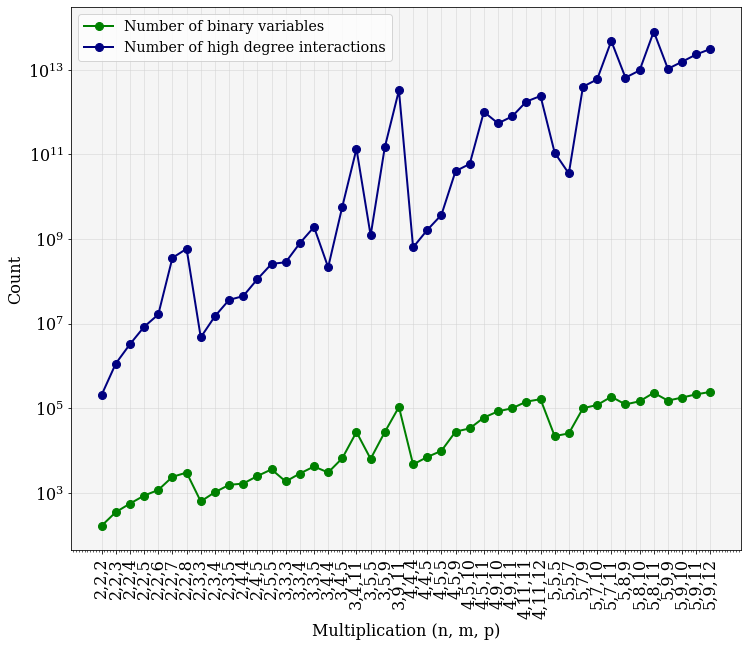

In [8]:
data = [[2, 2, 2, 2, 7], [2, 2, 2, 3, 11], [2, 2, 2, 4, 14], [2, 2, 2, 5, 18], [2, 2, 2, 6, 21], [3, 2, 2, 7, 25], [3, 2, 2, 8, 28], [2, 2, 3, 3, 15], [2, 2, 3, 4, 20], [2, 2, 3, 5, 25], [2, 2, 4, 4, 26], [2, 2, 4, 5, 33], [2, 2, 5, 5, 40], [3, 3, 3, 3, 23], [3, 3, 3, 4, 29], [3, 3, 3, 5, 36], [2, 3, 4, 4, 38], [3, 3, 4, 5, 47], [3, 3, 4, 11, 103], [2, 3, 5, 5, 58], [3, 3, 5, 9, 105], [3, 3, 9, 11, 225], [2, 4, 4, 4, 49], [2, 4, 4, 5, 63], [2, 4, 5, 5, 76], [2, 4, 5, 9, 139], [2, 4, 5, 10, 152], [3, 4, 5, 11, 169], [2, 4, 9, 10, 255], [2, 4, 9, 11, 280], [2, 4, 11, 11, 343], [2, 4, 11, 12, 366], [3, 5, 5, 5, 98], [2, 5, 5, 7, 134], [3, 5, 7, 9, 234], [3, 5, 7, 10, 257], [4, 5, 7, 11, 280], [3, 5, 8, 9, 262], [3, 5, 8, 10, 287], [4, 5, 8, 11, 317], [3, 5, 9, 9, 296], [3, 5, 9, 10, 323], [3, 5, 9, 11, 358], [3, 5, 9, 12, 381], [2, 6, 7, 9, 270], [3, 6, 7, 10, 296], [4, 6, 7, 11, 322], [3, 6, 8, 10, 329], [3, 6, 8, 11, 365], [3, 6, 9, 9, 342], [3, 6, 9, 10, 373], [3, 6, 9, 11, 411], [3, 7, 7, 9, 318], [3, 7, 7, 10, 350], [4, 7, 7, 11, 384], [3, 7, 8, 9, 354], [3, 7, 8, 10, 393], [3, 7, 8, 11, 432], [3, 7, 8, 12, 462], [3, 7, 9, 9, 399], [3, 7, 9, 10, 441], [3, 7, 9, 11, 481], [3, 7, 9, 12, 510], [2, 7, 10, 10, 478], [3, 7, 10, 11, 536], [3, 7, 11, 11, 582], [3, 8, 8, 10, 441], [3, 8, 8, 11, 489], [3, 8, 9, 10, 489], [3, 8, 9, 11, 533], [3, 8, 9, 12, 560], [2, 8, 10, 10, 532], [3, 8, 10, 11, 596], [3, 8, 10, 12, 636], [3, 8, 11, 11, 649], [3, 8, 11, 12, 691], [3, 9, 9, 9, 498], [3, 9, 9, 10, 534], [3, 9, 9, 11, 576], [3, 9, 10, 10, 606], [4, 9, 10, 11, 657], [3, 9, 10, 12, 696], [3, 9, 11, 11, 725], [3, 9, 11, 12, 760], [3, 10, 10, 10, 682], [4, 10, 10, 11, 746], [3, 10, 10, 12, 798], [3, 10, 11, 11, 821], [4, 10, 11, 12, 874], [3, 10, 12, 12, 928], [3, 11, 11, 11, 896], [3, 11, 11, 12, 941], [3, 11, 12, 12, 990]]
# Dividing data into three groups based on the value of n
group1 = [p for p in data if p[1] in [2, 3, 4, 5]]
group2 = [p for p in data if p[1] in [5, 6, 7]]
group3 = [p for p in data if p[1] in [8, 9, 10, 11]]

def calculate_and_plot(data_group):
    # Using the provided formula: n^2m^2p^2(Rk^3 + 1)^2 for the calculation
    limited_values = [n**2 * m**2 * p**2 * (R * k**3 + 1)**2 for k, n, m, p, R in data_group]
    number_of_variables = [R*k*(n*m + m*p + p*n) for k, n, m, p, R in data_group]
    x_labels = [f"{n},{m},{p}" for _, n, m, p, _ in data_group]

    # Plotting with the updated x-axis labels
    plt.figure(figsize=(12, 10))
    plt.yscale('log')
    plt.plot(number_of_variables, marker='o', markersize=8, linestyle='-', linewidth=2, color='green', label="Number of binary variables")
    plt.plot(limited_values, marker='o', markersize=8, linestyle='-', linewidth=2, color='navy', label="Number of high degree interactions")
    #plt.title('Plot of n^2 * m^2 * p^2 * (R * k^3 + 1)^2 with Custom Data Point Labels')
    plt.xlabel('Multiplication (n, m, p)', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(range(len(limited_values)), x_labels, rotation='vertical', fontsize=16)
    plt.grid(True)
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.minorticks_on()
    plt.tick_params(axis='y', labelsize=16)
    plt.legend()
    plt.legend(loc='upper left')
    plt.legend(fontsize='x-large')
    plt.show()
    
calculate_and_plot(group1)
#calculate_and_plot(group2)
#calculate_and_plot(group3)